Seq IO - align


In [1]:
from Bio.Seq import Seq
from Bio import pairwise2
from Bio import SeqIO
seq1 = Seq("ACCGGT") 
seq2 = Seq("ACGT")
alignments = pairwise2.align.globalxx(seq1,seq2)
print (alignments)

[Alignment(seqA='ACCGGT', seqB='A-C-GT', score=4.0, start=0, end=6), Alignment(seqA='ACCGGT', seqB='AC--GT', score=4.0, start=0, end=6), Alignment(seqA='ACCGGT', seqB='A-CG-T', score=4.0, start=0, end=6), Alignment(seqA='ACCGGT', seqB='AC-G-T', score=4.0, start=0, end=6)]


In [8]:
from Bio.pairwise2 import format_alignment 
alignments = pairwise2.align.globalxx(seq1, seq2) 
for alignment in alignments: 
    print(format_alignment(*alignments[3]))###lists the alignments based on index 0-first alignment, 1-2nd ....

ACCGGT
|| | |
AC-G-T
  Score=4

ACCGGT
|| | |
AC-G-T
  Score=4

ACCGGT
|| | |
AC-G-T
  Score=4

ACCGGT
|| | |
AC-G-T
  Score=4



In [12]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx("ACCGT", "ACG")
print(format_alignment(*alignments[0]))


ACCGT
| || 
A-CG-
  Score=3



In [13]:
for a in pairwise2.align.globalxx("ACCGTTTTTTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA", "ATGTCGCGCGCG"):
    print(format_alignment(*a,full_sequences=True))

A---C-CGTTTTTTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA----
|   | ||                                                               
ATGTCGCG-----------------------------------------------------------CGCG
  Score=4



In [12]:
###local alignmnets....xx represents match (it is a two letter representation for match)
### use of substitution matrices
###blosum62-substitution matrix; -10 - gap opening penalty;-1 is gap extension penalty

The match parameters are:

CODE  DESCRIPTION
x     No parameters. Identical characters have score of 1, otherwise 0.


m     A match score is the score of identical chars, otherwise mismatch
      score.


d     A dictionary returns the score of any pair of characters.


c     A callback function returns scores.
The gap penalty parameters are:

CODE  DESCRIPTION
x     No gap penalties.


s     Same open and extend gap penalties for both sequences.


d     The sequences have different open and extend gap penalties.


c     A callback function returns the gap penalties.

In [15]:
from Bio import pairwise2
from Bio.SubsMat.MatrixInfo import blosum62
alignments = pairwise2.align.localmx("LSPADKTNVKAA", "PEEKSAV", 2, -1)
print(pairwise2.format_alignment(*alignments[3]))


3 PAD--KTNVK-A
  |    |     |
1 P--EEK----SA
  Score=6



In [15]:
for a in pairwise2.align.globalms("LSPADKTNVKAA", "PEEKSAV", 5, -1, -.5, -.1):
    print(format_alignment(*a))

LSP----ADKTNVKAA
  |    |    |   
--PEEKSA----V---
  Score=12.1



In [28]:
from Bio.SubsMat import MatrixInfo as matlist
matrix = matlist.blosum62
for a in pairwise2.align.globaldx("KEVLA", "EVL", matrix):
    print(format_alignment(*a))


KEVLA
 ||| 
-EVL-
  Score=13



In [10]:
###multiple alignmnets

In [44]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
a = SeqRecord(Seq("AAAACGT"), id="Alpha")
b = SeqRecord(Seq("AAA-CGT"), id="Beta")
c = SeqRecord(Seq("AAAAGGT"), id="Gamma")
align = MultipleSeqAlignment([a, b, c])
print(align)


Alignment with 3 rows and 7 columns
AAAACGT Alpha
AAA-CGT Beta
AAAAGGT Gamma


In [48]:
####extend
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
a = SeqRecord(Seq("AATACGTA"), id="Alpha")
b = SeqRecord(Seq("ATA-CGTC"), id="Beta")
c = SeqRecord(Seq("AAAAGGTG"), id="Gamma")
d = SeqRecord(Seq("AAAACGTA"), id="Delta")
e = SeqRecord(Seq("AAA-GGTC"), id="Epsilon")
align = MultipleSeqAlignment([a, b, c])
print(align)

Alignment with 3 rows and 8 columns
AATACGTA Alpha
ATA-CGTC Beta
AAAAGGTG Gamma


In [47]:
align.extend([d, e])
print(align)

Alignment with 5 rows and 7 columns
AATACGT Alpha
ATA-CGT Beta
AAAAGGT Gamma
AAAACGT Delta
AAA-GGT Epsilon


In [14]:
from Bio import AlignIO
alignment = AlignIO.read("pfamtestfile.sth", "stockholm")

In [15]:
print(alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


In [16]:
print("Alignment length %i" % alignment.get_alignment_length())

Alignment length 52


In [49]:
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


In [17]:
from Bio import AlignIO
alignment = AlignIO.read("alignseqfile.fasta", "fasta")
print(alignment)

Alignment with 3 rows and 120 columns
SATVSEINSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHS...CMH SEQUENCE_1
SATVSEINSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHS...KGH SEQUENCE_2
ATVSTEFDSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHS...CMH SEQUENCE_3


In [18]:
###convert between alignmnets
from Bio import AlignIO
alignment = AlignIO.read("pfamtestfile.sth", "stockholm")
AlignIO.write([alignment], "convertedclustal.aln", "clustal")

1

In [20]:
from Bio import Phylo
tree = Phylo.read("tree.dnd", "newick")
print (tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00111)
            Clade(branch_length=0.00267)
                Clade(branch_length=0.00688)
                    Clade(branch_length=0.00556, name='gi|6273291|gb|AF191665.1|AF191665')
                    Clade(branch_length=0.00116)
                        Clade(branch_length=-0.00011, name='gi|6273290|gb|AF191664.1|AF191664')
                        Clade(branch_length=0.00122, name='gi|6273289|gb|AF191663.1|AF191663')
                Clade(branch_length=0.00629, name='gi|6273287|gb|AF191661.1|AF191661')
            Clade(branch_length=0.00338, name='gi|6273286|gb|AF191660.1|AF191660')
        Clade(branch_length=0.00112, name='gi|6273285|gb|AF191659.1|AF191659')
        Clade(branch_length=0.0, name='gi|6273284|gb|AF191658.1|AF191658')


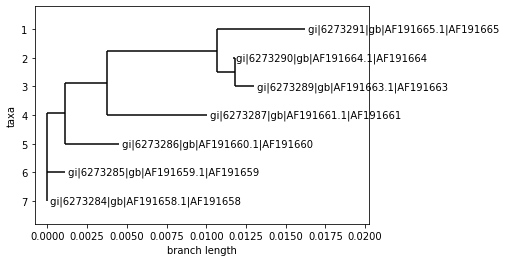

In [38]:
Phylo.draw(tree)

In [1]:
#### Plotting DNA traces

In [2]:
from Bio import SeqIO

record = SeqIO.read('test.ab1', 'abi')

In [3]:
record.annotations.keys()

dict_keys(['sample_well', 'dye', 'polymer', 'machine_model', 'run_start', 'run_finish', 'abif_raw', 'molecule_type'])

In [4]:
record.annotations['abif_raw'].keys()

dict_keys(['AEPt1', 'AEPt2', 'APFN2', 'APXV1', 'APrN1', 'APrV1', 'APrX1', 'ARTN1', 'ASPF1', 'ASPt1', 'ASPt2', 'AUDT1', 'B1Pt1', 'B1Pt2', 'BCTS1', 'BufT1', 'CTID1', 'CTNM1', 'CTOw1', 'CTTL1', 'CpEP1', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12', 'DCHT1', 'DSam1', 'DySN1', 'Dye#1', 'DyeN1', 'DyeN2', 'DyeN3', 'DyeN4', 'DyeW1', 'DyeW2', 'DyeW3', 'DyeW4', 'EPVt1', 'EVNT1', 'EVNT2', 'EVNT3', 'EVNT4', 'FTab1', 'FVoc1', 'FWO_1', 'Feat1', 'GTyp1', 'HCFG1', 'HCFG2', 'HCFG3', 'HCFG4', 'InSc1', 'InVt1', 'LANE1', 'LAST1', 'LIMS1', 'LNTD1', 'LsrP1', 'MCHN1', 'MODF1', 'MODL1', 'NAVG1', 'NLNE1', 'NOIS1', 'P1AM1', 'P1RL1', 'P1WD1', 'P2AM1', 'P2BA1', 'P2RL1', 'PBAS1', 'PBAS2', 'PCON1', 'PCON2', 'PDMF1', 'PDMF2', 'PLOC1', 'PLOC2', 'PSZE1', 'PTYP1', 'PXLB1', 'RGNm1', 'RMXV1', 'RMdN1', 'RMdV1', 'RMdX1', 'RPrN1', 'RPrV1', 'RUND1', 'RUND2', 'RUND3', 'RUND4', 'RUNT1', 'RUNT2', 'RUNT3', 'RUNT4', 'Rate1', 'RunN1', 'S/N%1', 'SCAN1', 'SMED1', 'SMLt

In [5]:
channels = ['DATA9', 'DATA10', 'DATA11', 'DATA12']

from collections import defaultdict

trace = defaultdict(list)

for c in channels:
    trace[c] = record.annotations['abif_raw'][c]

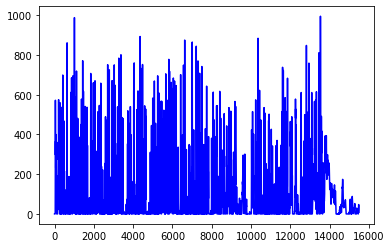

In [6]:
import matplotlib.pyplot as plt
plt.plot(trace['DATA9'], color='blue')


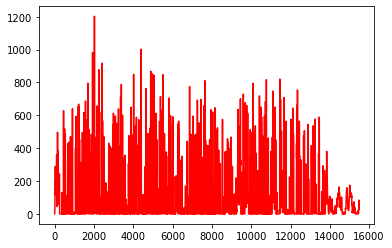

In [7]:
plt.plot(trace['DATA10'], color='red')


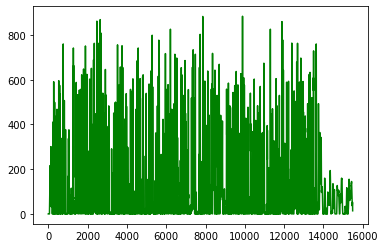

In [24]:
plt.plot(trace['DATA11'], color='green')


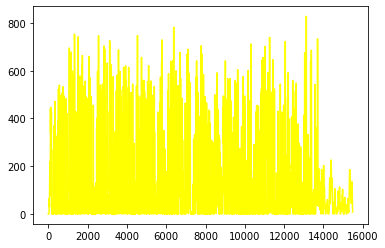

In [10]:
plt.plot(trace['DATA12'], color='yellow')


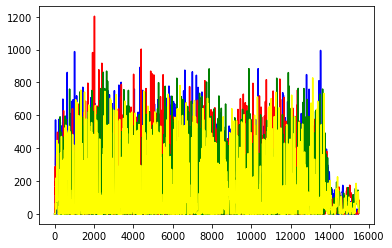

In [26]:
plt.plot(trace['DATA9'], color='blue')
plt.plot(trace['DATA10'], color='red')
plt.plot(trace['DATA11'], color='green')
plt.plot(trace['DATA12'], color='yellow')
plt.show()